In this notebook, we will be working on your final analysis. This should be a great deal harder than what you have done before, so be prepared to be challenged.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import sys
for p in sys.path:
    print(p)

/Users/oscar_linares/Documents/GitHub/Course-Overview/week_12
/Users/oscar_linares/.pyenv/versions/3.7.1/lib/python37.zip
/Users/oscar_linares/.pyenv/versions/3.7.1/lib/python3.7
/Users/oscar_linares/.pyenv/versions/3.7.1/lib/python3.7/lib-dynload

/Users/oscar_linares/.pyenv/versions/ds_py3/lib/python3.7/site-packages
/Users/oscar_linares/.pyenv/versions/ds_py3/lib/python3.7/site-packages/IPython/extensions
/Users/oscar_linares/.ipython


In [5]:
airlines = pd.read_csv("../data/airline.csv", parse_dates=['date'])
airlines.head()

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,NaN,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,NaN,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,NaN,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,NaN,8.0,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,NaN,4.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0


In this data set, we will analyze airline reviews that we can see in the above table. These will be compound queries, so you may have to do a say a grouping then divide one part by another part. (Note that an Internet search will not give you the answers.)
*IN SENTENCE 2 IT SAYS "do a say a grouping." WHAT IS INTENDED HERE?*

Here is the data set: https://github.com/quankiquanki/skytrax-reviews-dataset

Be sure to read the documentation.

For every airline, what is the proportion of recommended reviews (`recommended == 1`) and not recommended reviews out of the total? In other words, for every airline, what percentage of reviews are negative and what percentage are positive? Your output may be a multi-index with the proportions in a column.

In [6]:
airlines.groupby('airline_name')['recommended'] \
.agg(pct_recommended = lambda x: x.sum() /x.count())

,pct_recommended
airline_name,
adria-airways,0.519231
aegean-airlines,0.789916
aer-lingus,0.689904
aerocaribbean,0.333333
aeroflot-russian-airlines,0.701613
...,...
xiamen-airlines,0.354839
xl-airways-france,0.621622
yakutia-airlines,1.000000


In [7]:
def pct_positive_recos__(df):
    df['pct_recommended'] = df['recommended'].sum() /df['recommended'].count()
    return df 


In [8]:
airlines_df = airlines.groupby('airline_name').apply(pct_positive_recos__)

In [9]:
print(airlines.shape)
print(airlines_df.shape)

(41396, 20)
(41396, 21)


In [10]:
airlines_df

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,...,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,pct_recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,...,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1,0.519231
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,...,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1,0.519231
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,...,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1,0.519231
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,...,8.0,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1,0.519231
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,...,4.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0,0.519231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41391,wizz-air,/airline-reviews/wizz-air,Wizz Air customer review,A Bland,United Kingdom,2010-07-15,This airline is terrible! Timetable changes (m...,NaN,NaN,Economy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,0.479853
41392,wizz-air,/airline-reviews/wizz-air,Wizz Air customer review,S Scoots,Belgium,2010-06-23,We often fly with Wizzair to/from Charleroi/Bu...,NaN,NaN,Economy,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1,0.479853
41393,wizz-air,/airline-reviews/wizz-air,Wizz Air customer review,C O'Keeffe,Ireland,2010-06-19,Avoid Wizzair! A group of us had our outgoing ...,NaN,NaN,Economy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,0.479853
41394,wizz-air,/airline-reviews/wizz-air,Wizz Air customer review,L Jahoda,Czech Republic,2010-06-16,PRG-LTN and LTN-PRG were rather good flights. ...,NaN,NaN,Economy,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1,0.479853


You will find that the results for WestJet are the following:
*IS THE TABLE COMPLETE? I AM NOT SEEING "WESTJET" IN THE TABLE, JUST ADRIA-AIRWAYS.*

Recommended Value 0: 0.597222 (or 59.7%)

Recommended Value 1: 0.402778 (or 40%)

Print out the result for just `peach-aviation`.
*THIS AIRLINE NAME IS IN COURIER FONT. SHOULD IT BE REGULAR FONT?*

In [11]:
airlines_df[airlines_df['airline_name'] == 'peach-aviation']

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,...,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,pct_recommended
26635,peach-aviation,/airline-reviews/peach-aviation,Peach Aviation customer review,James Cowcher,Australia,2015-07-11,"Well it's a budget airline, so you don't expec...",NaN,FamilyLeisure,Economy,...,1.0,1.0,3.0,NaN,NaN,1.0,NaN,2.0,0,0.777778
26645,peach-aviation,/airline-reviews/peach-aviation,Peach Aviation customer review,L Evans,Australia,2015-01-14,Busan to Osaka 4th July 2014 and no issues wha...,NaN,NaN,Economy,...,10.0,4.0,3.0,0.0,0.0,NaN,NaN,4.0,1,0.777778
26646,peach-aviation,/airline-reviews/peach-aviation,Peach Aviation customer review,D Mount,United States,2014-06-18,I made two trips on Peach Taipei to Kansai and...,NaN,NaN,Economy,...,9.0,3.0,5.0,4.0,0.0,NaN,NaN,5.0,1,0.777778
26658,peach-aviation,/airline-reviews/peach-aviation,Peach Aviation customer review,Perrin Michel,Brazil,2014-03-11,To those who complain about European LCs I wou...,NaN,NaN,Economy,...,3.0,3.0,5.0,3.0,0.0,NaN,NaN,3.0,0,0.777778
26659,peach-aviation,/airline-reviews/peach-aviation,Peach Aviation customer review,Michael Hollifield,South Korea,2014-02-17,Seoul to Osaka Round Trip (2/14 and return 2/1...,NaN,NaN,Economy,...,9.0,4.0,5.0,4.0,0.0,NaN,NaN,5.0,1,0.777778
26670,peach-aviation,/airline-reviews/peach-aviation,Peach Aviation customer review,I Wright,Australia,2014-01-13,Sapporo to Osaka Kansai. Peach are a fantastic...,NaN,NaN,Economy,...,10.0,5.0,5.0,5.0,0.0,NaN,NaN,5.0,1,0.777778
26671,peach-aviation,/airline-reviews/peach-aviation,Peach Aviation customer review,J Stern,United States,2013-06-16,ICN-KIX-SDJ SDJ-KIX-ICN: Fantastic experience ...,NaN,NaN,Economy,...,10.0,4.0,5.0,4.0,0.0,NaN,NaN,5.0,1,0.777778
26682,peach-aviation,/airline-reviews/peach-aviation,Peach Aviation customer review,J Andrews,United Kingdom,2013-06-12,Kansai-Sendai. Lovely new planes with wide lea...,NaN,NaN,Economy,...,9.0,5.0,5.0,0.0,0.0,NaN,NaN,5.0,1,0.777778
26683,peach-aviation,/airline-reviews/peach-aviation,Peach Aviation customer review,R Koga,Australia,2012-11-15,FUK-KIX MM152/MM159 A320-300. New aircraft and...,NaN,NaN,Economy,...,10.0,5.0,5.0,5.0,0.0,NaN,NaN,5.0,1,0.777778


Plot a histogram of the number of reviews where their authors have written more than 10 reviews.

In [12]:
airlines_df.groupby('author').size().sort_values(ascending=False)

author
Anders Pedersen          58
Tercon Bojan             54
J Bacallado              52
Roger Stone              50
D Graubard               47
                         ..
Marianne Ramsey           1
Marianne Stevens          1
Marianne Zwicklbauer      1
Maribel Lopera Sierra     1
 Moam Ben-Shalom          1
Length: 29652, dtype: int64

In [13]:
airlines_df[airlines_df['author'] == 'Anders Pedersen'].shape

(58, 21)

In [14]:
def count_author_reviews__(df):
    df['num_author_reviews'] = len(df.index)
    return df

In [15]:
airlines_df1 = airlines_df.groupby('author').apply(count_author_reviews__)

In [16]:
airlines_df1.head()

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,...,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,pct_recommended,num_author_reviews
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,...,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1,0.519231,12
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,...,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1,0.519231,38
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,...,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1,0.519231,1
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,...,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1,0.519231,54
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,...,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0,0.519231,2


In [17]:
mt10_reviews_ps = pd.Series(airlines_df1[airlines_df1['num_author_reviews'] > 10].index)

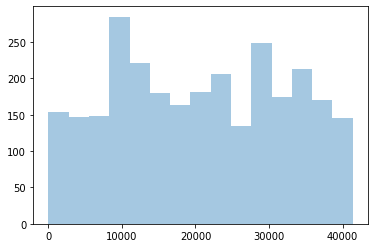

In [18]:
sns.distplot(mt10_reviews_ps, kde=False)

Plot a bar graph of the overall ratings.

What is the difference between the median overall rating for all authors from the United Kingdom and the United States?

In [19]:
airlines_df1['overall_rating'].mean()

6.039526871218904

In [20]:
airlines_df1[airlines_df1['author_country'].str.lower() == 'united kingdom']['overall_rating'].mean()

6.370615034168565

What is the difference between the average overall rating for all authors from the United Kingdom and the United States?
Print the standard deviation for each group.
Print the total number of reviews for each group.

In [21]:
airlines_df1[airlines_df1['author_country'].str.lower() == 'united states']['overall_rating'].mean()

5.2348671596822784

In [22]:
airlines_df1[airlines_df1['author_country'].str.lower() == 'united kingdom']['overall_rating'].std()

3.122184685663643

In [23]:
airlines_df1[airlines_df1['author_country'].str.lower() == 'united states']['overall_rating'].std()

3.5542675488314313

You should see now that there is a visible difference between these two groups, but is this a statistically significant difference? To see that, we will perform a t-test, which will compare the means of the two groups to see if this difference is due to random chance or due to chance.

You can read more about the t-test on Wikipedia; it is definitely something you will come across in the future.

https://en.wikipedia.org/wiki/Student%27s_t-test

For a quick reference, we assume that we need a large-enough sample size that our two samples are independent from one another and that the overall population has equal variance. These are safe assumptions as we saw from what we printed out above.

I have imported the required function from SciPy. It is up to you to pass in the relevant values. Be sure to look specifically at the types of the input in the function. (You also may need to drop the blank values if there are any).

In [24]:
from scipy.stats import ttest_ind

Print out your calculated p-value.

In [25]:
us_ratings_ps = airlines_df1[airlines_df1['author_country'].str.lower() == 'united states']['overall_rating']
uk_ratings_ps = airlines_df1[airlines_df1['author_country'].str.lower() == 'united kingdom']['overall_rating']

In [26]:
us_ratings_ps.describe()

count    7302.000000
mean        5.234867
std         3.554268
min         1.000000
25%         1.000000
50%         5.000000
75%         9.000000
max        10.000000
Name: overall_rating, dtype: float64

In [27]:
uk_ratings_ps.describe()

count    8780.000000
mean        6.370615
std         3.122185
min         1.000000
25%         3.000000
50%         7.000000
75%         9.000000
max        10.000000
Name: overall_rating, dtype: float64

In [28]:
def pct_nulls(pandas_series):
    n = pandas_series.count()
    n_nulls = pandas_series.isna().sum()
    return round(n_nulls/n, 4) * 100
    

In [29]:
pct_nulls(us_ratings_ps)

16.5

In [30]:
pct_nulls(uk_ratings_ps)

13.54

In [31]:
us_ratings_npa = us_ratings_ps.dropna().to_numpy(copy=True)
us_ratings_npa

array([10.,  8., 10., ...,  7.,  1., 10.])

In [32]:
uk_ratings_npa = uk_ratings_ps.dropna().to_numpy(copy=True)
uk_ratings_npa

array([ 5., 10.,  7., ...,  5.,  9.,  1.])

In [33]:
us_ratings_npa.std()

3.554024164193982

In [34]:
uk_ratings_npa.std()

3.1220068796504767

In [35]:
t_stat, p_value = ttest_ind(us_ratings_npa, uk_ratings_npa)
print(t_stat)
print(p_value)

-21.564765347068853
1.0571877611044923e-101


means for UK and US ratings are statistically different

In your own words, what does this p-value mean? You may certainly refer to wikipedia (https://en.wikipedia.org/wiki/P-value), but phrase it in your own words.

Now we are observing some difference, and from your calculations you should have gotten a small p-value. What does this tell us about the data? We can't be completely sure yet. Perhaps these groups are using a lot of different airlines. Perhaps the difference lies in the different airlines that they use rather than in the overall sentiment of the passengers.

Once you have the total review counts for these author countries, look at the absolute difference. That is to say, be sure to look at the difference between the counts as an absolute value rather than a positive or negative value. Sort and print the airlines with the biggest difference in review counts between the two countries. (Hint: British Airlines is one of them.)

In [46]:
airlines_us_uk_df.groupby('airline_name').mean()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,pct_recommended,num_author_reviews
airline_name,,,,,,,,,,,
adria-airways,7.400000,4.000000,5.000000,4.000000,1.000000,NaN,NaN,3.000000,0.800000,0.519231,10.400000
aegean-airlines,7.925000,3.681818,4.030303,3.800000,2.047619,4.500000,2.0,3.734940,0.783133,0.789916,3.674699
aer-lingus,7.162996,3.350254,3.629442,2.865285,2.269430,3.555556,1.0,3.524194,0.649194,0.689904,2.431452
aerocaribbean,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.333333,1.000000
aeroflot-russian-airlines,6.783333,3.264151,3.603774,3.264151,3.075472,3.400000,2.0,3.781250,0.626866,0.701613,1.761194
...,...,...,...,...,...,...,...,...,...,...,...
wizz-air,5.656000,2.316327,2.642857,1.505618,0.465116,1.615385,1.0,2.833333,0.432099,0.479853,1.839506
wow-air,7.863636,3.772727,4.227273,3.200000,1.350000,3.000000,1.0,4.045455,0.818182,0.774194,2.636364
xiamen-airlines,8.250000,4.000000,4.000000,4.000000,3.000000,NaN,NaN,3.250000,0.750000,0.354839,1.750000


In [47]:
airlines_us_uk_df.groupby('airline_name').apply(np.mean)

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,pct_recommended,num_author_reviews
airline_name,,,,,,,,,,,
adria-airways,7.400000,4.000000,5.000000,4.000000,1.000000,NaN,NaN,3.000000,0.800000,0.519231,10.400000
aegean-airlines,7.925000,3.681818,4.030303,3.800000,2.047619,4.500000,2.0,3.734940,0.783133,0.789916,3.674699
aer-lingus,7.162996,3.350254,3.629442,2.865285,2.269430,3.555556,1.0,3.524194,0.649194,0.689904,2.431452
aerocaribbean,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.333333,1.000000
aeroflot-russian-airlines,6.783333,3.264151,3.603774,3.264151,3.075472,3.400000,2.0,3.781250,0.626866,0.701613,1.761194
...,...,...,...,...,...,...,...,...,...,...,...
wizz-air,5.656000,2.316327,2.642857,1.505618,0.465116,1.615385,1.0,2.833333,0.432099,0.479853,1.839506
wow-air,7.863636,3.772727,4.227273,3.200000,1.350000,3.000000,1.0,4.045455,0.818182,0.774194,2.636364
xiamen-airlines,8.250000,4.000000,4.000000,4.000000,3.000000,NaN,NaN,3.250000,0.750000,0.354839,1.750000


In [150]:
airlines_us_uk_df.groupby('airline_name').agg(np.mean)

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,pct_recommended,num_author_reviews
airline_name,,,,,,,,,,,
adria-airways,7.400000,4.000000,5.000000,4.000000,1.000000,NaN,NaN,3.000000,0.800000,0.519231,10.400000
aegean-airlines,7.925000,3.681818,4.030303,3.800000,2.047619,4.500000,2.0,3.734940,0.783133,0.789916,3.674699
aer-lingus,7.162996,3.350254,3.629442,2.865285,2.269430,3.555556,1.0,3.524194,0.649194,0.689904,2.431452
aerocaribbean,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.333333,1.000000
aeroflot-russian-airlines,6.783333,3.264151,3.603774,3.264151,3.075472,3.400000,2.0,3.781250,0.626866,0.701613,1.761194
...,...,...,...,...,...,...,...,...,...,...,...
wizz-air,5.656000,2.316327,2.642857,1.505618,0.465116,1.615385,1.0,2.833333,0.432099,0.479853,1.839506
wow-air,7.863636,3.772727,4.227273,3.200000,1.350000,3.000000,1.0,4.045455,0.818182,0.774194,2.636364
xiamen-airlines,8.250000,4.000000,4.000000,4.000000,3.000000,NaN,NaN,3.250000,0.750000,0.354839,1.750000


In [149]:
airlines_us_uk_df.groupby('airline_name').transform(np.mean)

,date,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,pct_recommended,num_author_reviews
1,2012-03-31 09:36:00.000000000,7.400,4.000000,5.000000,4.000000,1.000000,NaN,NaN,3.000000,0.800000,0.519231,10.400000
18,2012-03-31 09:36:00.000000000,7.400,4.000000,5.000000,4.000000,1.000000,NaN,NaN,3.000000,0.800000,0.519231,10.400000
24,2012-03-31 09:36:00.000000000,7.400,4.000000,5.000000,4.000000,1.000000,NaN,NaN,3.000000,0.800000,0.519231,10.400000
25,2012-03-31 09:36:00.000000000,7.400,4.000000,5.000000,4.000000,1.000000,NaN,NaN,3.000000,0.800000,0.519231,10.400000
26,2012-03-31 09:36:00.000000000,7.400,4.000000,5.000000,4.000000,1.000000,NaN,NaN,3.000000,0.800000,0.519231,10.400000
...,...,...,...,...,...,...,...,...,...,...,...,...
41386,2013-04-13 13:55:33.333333248,5.656,2.316327,2.642857,1.505618,0.465116,1.615385,1.0,2.833333,0.432099,0.479853,1.839506
41389,2013-04-13 13:55:33.333333248,5.656,2.316327,2.642857,1.505618,0.465116,1.615385,1.0,2.833333,0.432099,0.479853,1.839506
41390,2013-04-13 13:55:33.333333248,5.656,2.316327,2.642857,1.505618,0.465116,1.615385,1.0,2.833333,0.432099,0.479853,1.839506
41391,2013-04-13 13:55:33.333333248,5.656,2.316327,2.642857,1.505618,0.465116,1.615385,1.0,2.833333,0.432099,0.479853,1.839506


In [48]:
airlines_us_uk_df.groupby('airline_name').agg(np.mean)

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,pct_recommended,num_author_reviews
airline_name,,,,,,,,,,,
adria-airways,7.400000,4.000000,5.000000,4.000000,1.000000,NaN,NaN,3.000000,0.800000,0.519231,10.400000
aegean-airlines,7.925000,3.681818,4.030303,3.800000,2.047619,4.500000,2.0,3.734940,0.783133,0.789916,3.674699
aer-lingus,7.162996,3.350254,3.629442,2.865285,2.269430,3.555556,1.0,3.524194,0.649194,0.689904,2.431452
aerocaribbean,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.333333,1.000000
aeroflot-russian-airlines,6.783333,3.264151,3.603774,3.264151,3.075472,3.400000,2.0,3.781250,0.626866,0.701613,1.761194
...,...,...,...,...,...,...,...,...,...,...,...
wizz-air,5.656000,2.316327,2.642857,1.505618,0.465116,1.615385,1.0,2.833333,0.432099,0.479853,1.839506
wow-air,7.863636,3.772727,4.227273,3.200000,1.350000,3.000000,1.0,4.045455,0.818182,0.774194,2.636364
xiamen-airlines,8.250000,4.000000,4.000000,4.000000,3.000000,NaN,NaN,3.250000,0.750000,0.354839,1.750000


In [125]:
airlines_df1['overall_rating_uk']= airlines_df1[airlines_df1['author_country'].str.lower() == 'united kingdom']['overall_rating']
airlines_df1['overall_rating_us']= airlines_df1[airlines_df1['author_country'].str.lower() == 'united states']['overall_rating']

In [143]:
by_airline_df = airlines_df1.groupby('airline_name')[['overall_rating_uk', 'overall_rating_us']].agg(['count', 'mean'])

In [135]:
by_airline_df.columns

MultiIndex([(   'overall_rating', 'count'),
            (   'overall_rating',  'mean'),
            ('overall_rating_uk', 'count'),
            ('overall_rating_uk',  'mean'),
            ('overall_rating_us', 'count'),
            ('overall_rating_us',  'mean')],
           )

In [144]:
by_airline_df['us_uk_count_delta'] = abs(by_airline_df[('overall_rating_uk',  'mean')] - by_airline_df[('overall_rating_us', 'count')])

In [146]:
by_airline_df.sort_values('us_uk_count_delta', ascending=False, inplace=True)

Above we observed a difference that was significant between these two populations, but now that we look further, we can see that there are some pretty significant differences between the airlines that they are using. 

For these top five airlines (the top passenger differences), what is the average passenger review for the United States? The United Kingdom? What is the total number of reviews for the United States? The United Kingdom?

In [148]:
by_airline_df.head()

overall_rating_uk         overall_rating_us            \
                               count    mean             count      mean   
airline_name                                                               
spirit-airlines                    1  10.000               917  2.777535   
united-airlines                   80   5.225               537  2.996276   
american-airlines                118   4.000               368  3.448370   
allegiant-air                      1   1.000               250  4.576000   
southwest-airlines                15   7.800               256  6.453125   

                   us_uk_count_delta  
                                      
airline_name                          
spirit-airlines              907.000  
united-airlines              531.775  
american-airlines            364.000  
allegiant-air                249.000  
southwest-airlines           248.200

In this example lies a reality of data analysis. We started with something that looked pretty easy (and would make for a great story). It might be funny to say that the U.S. population is just plain grumpier than the U.K. population when it comes to writing airline reviews. However, we can't prove that beyond a reasonable doubt simply because the make-up of the populations is drastically different. For example, only one person flew on Spirit Airlines from the United Kingdom, while nearly 1,000 flew on Spirit Airlines from the United States. Spirit Airlines might just be a worse experience overall.

Now for your final question: In our data set from this week, we saw that flight 1428 is the most delayed both in the morning and in the evening. Investigate and find out why that is. The data has been loaded for you below.

In [36]:
df = pd.read_csv('../data/june_airplane_data.csv', names=pd.read_html("http://stat-computing.org/dataexpo/2009/the-data.html")[1][1][1:])

ImportError: lxml not found, please install it